DDA Points: [(1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6), (8, 6), (9, 7), (10, 8)]
Bresenham Points: [(1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6), (8, 6), (9, 7), (10, 8)]


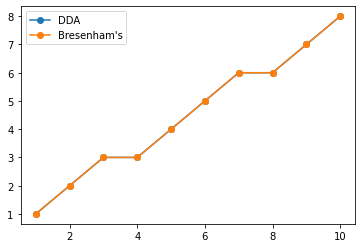

In [6]:
#1
import matplotlib.pyplot as plt

def dda_line(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    steps = abs(dx) if abs(dx) > abs(dy) else abs(dy)
    x_increment = dx / steps
    y_increment = dy / steps
    
    x = x1
    y = y1
    
    points = []
    points.append((round(x), round(y)))
    
    for _ in range(steps):
        x += x_increment
        y += y_increment
        points.append((round(x), round(y)))
    
    return points

def bresenham_line(x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    steep = dy > dx
    
    if steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    error = dx / 2
    y_increment = 1 if y1 < y2 else -1
    y = y1
    
    points = []
    
    for x in range(x1, x2 + 1):
        point = (y, x) if steep else (x, y)
        points.append(point)
        
        error -= dy
        if error < 0:
            y += y_increment
            error += dx
    
    return points

# Test the algorithms
x1, y1 = 1, 1
x2, y2 = 10, 8

# DDA algorithm
dda_points = dda_line(x1, y1, x2, y2)
print("DDA Points:", dda_points)

# Bresenham's algorithm
bresenham_points = bresenham_line(x1, y1, x2, y2)
print("Bresenham Points:", bresenham_points)

# Plotting the lines
plt.plot(*zip(*dda_points), marker='o', label='DDA')
plt.plot(*zip(*bresenham_points), marker='o', label="Bresenham's")
plt.legend()
plt.show()


Circle Points: [(0, 5), (0, -5), (0, 5), (0, -5), (5, 0), (5, 0), (-5, 0), (-5, 0), (1, 5), (1, -5), (-1, 5), (-1, -5), (5, 1), (5, -1), (-5, 1), (-5, -1), (2, 5), (2, -5), (-2, 5), (-2, -5), (5, 2), (5, -2), (-5, 2), (-5, -2), (3, 4), (3, -4), (-3, 4), (-3, -4), (4, 3), (4, -3), (-4, 3), (-4, -3)]


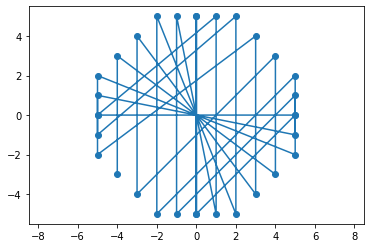

In [7]:
#2
import matplotlib.pyplot as plt

def draw_circle(radius):
    x = 0
    y = radius
    d = 1 - radius
    delta_e = 3
    delta_se = -2 * radius + 5
    
    points = []
    
    while y >= x:
        points.extend([
            (x, y), (x, -y), (-x, y), (-x, -y),
            (y, x), (y, -x), (-y, x), (-y, -x)
        ])
        
        if d < 0:
            d += delta_e
            delta_e += 2
            delta_se += 2
        else:
            d += delta_se
            delta_e += 2
            delta_se += 4
            y -= 1
        
        x += 1
    
    return points

# Test the algorithm
radius = 5

# Midpoint circle drawing algorithm
circle_points = draw_circle(radius)
print("Circle Points:", circle_points)

# Plotting the circle
plt.plot(*zip(*circle_points), marker='o')
plt.axis('equal')
plt.show()


Clipped Line: (1, 1) (10, 8)


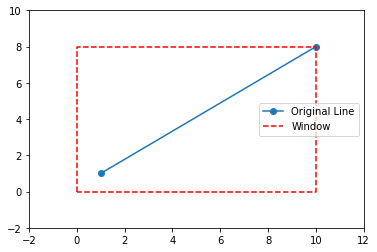

In [11]:
#3
import matplotlib.pyplot as plt

# Define the region codes
INSIDE = 0  # 0000
LEFT = 1    # 0001
RIGHT = 2   # 0010
BOTTOM = 4  # 0100
TOP = 8     # 1000

# Define the window boundaries
x_min, y_min = 0, 0
x_max, y_max = 10, 8

def compute_region_code(x, y):
    code = INSIDE
    
    if x < x_min:
        code |= LEFT
    elif x > x_max:
        code |= RIGHT
        
    if y < y_min:
        code |= BOTTOM
    elif y > y_max:
        code |= TOP
    
    return code

def clip_line(x1, y1, x2, y2):
    code1 = compute_region_code(x1, y1)
    code2 = compute_region_code(x2, y2)
    
    while True:
        if code1 == 0 and code2 == 0:
            return x1, y1, x2, y2
        
        if code1 & code2 != 0:
            return None
        
        code_out = code1 if code1 != 0 else code2
        
        x, y = None, None
        
        if code_out & TOP:
            x = x1 + (x2 - x1) * (y_max - y1) / (y2 - y1)
            y = y_max
        elif code_out & BOTTOM:
            x = x1 + (x2 - x1) * (y_min - y1) / (y2 - y1)
            y = y_min
        elif code_out & RIGHT:
            y = y1 + (y2 - y1) * (x_max - x1) / (x2 - x1)
            x = x_max
        elif code_out & LEFT:
            y = y1 + (y2 - y1) * (x_min - x1) / (x2 - x1)
            x = x_min
        
        if code_out == code1:
            x1, y1 = x, y
            code1 = compute_region_code(x1, y1)
        else:
            x2, y2 = x, y
            code2 = compute_region_code(x2, y2)

# Test the algorithm
x1, y1 = 1, 1
x2, y2 = 10, 8

# Clip the line using Cohen-Sutherland algorithm
clipped_line = clip_line(x1, y1, x2, y2)
if clipped_line is None:
    print("Line is completely outside the window.")
else:
    x1, y1, x2, y2 = clipped_line
    print("Clipped Line:", (x1, y1), (x2, y2))

# Plotting the line and window
plt.plot([x1, x2], [y1, y2], marker='o', label='Original Line')
plt.plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min], 'r--', label='Window')
plt.legend()
plt.xlim(-2, 12)
plt.ylim(-2, 10)
plt.show()


Clipped Polygon: [(6.0, 4), (3, 6), (3.0, 4)]


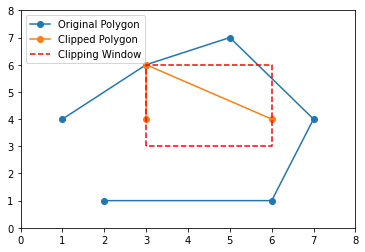

In [13]:
#4
import matplotlib.pyplot as plt

# Define the polygon vertices
polygon = [(2, 1), (6, 1), (7, 4), (5, 7), (3, 6), (1, 4)]

# Define the clipping window boundaries
x_min, y_min = 3, 3
x_max, y_max = 6, 6

def inside(point):
    x, y = point
    return x_min <= x <= x_max and y_min <= y <= y_max

def intersection(p1, p2, edge):
    x1, y1 = p1
    x2, y2 = p2
    x_edge, y_edge = edge
    
    if y1 == y2:
        x_int = x1
        y_int = y_edge
    else:
        m_edge = (y_edge - y1) / (x_edge - x1)
        b_edge = y_edge - m_edge * x_edge
        
        if m_edge == 0:
            x_int = x_edge
        else:
            x_int = (y1 - b_edge) / m_edge
        
        y_int = y_edge
    
    return x_int, y_int


def clip_polygon(polygon):
    output_polygon = polygon
    
    for edge_start, edge_end in zip(polygon, polygon[1:] + [polygon[0]]):
        input_polygon = output_polygon
        output_polygon = []
        
        s = input_polygon[-1]
        
        for p in input_polygon:
            if inside(p):
                if not inside(s):
                    output_polygon.append(intersection(s, p, edge_start))
                output_polygon.append(p)
            elif inside(s):
                output_polygon.append(intersection(s, p, edge_start))
            
            s = p
        
    return output_polygon

# Test the algorithm
clipped_polygon = clip_polygon(polygon)
print("Clipped Polygon:", clipped_polygon)

# Plotting the polygon and window
x_poly, y_poly = zip(*polygon)
x_clip, y_clip = zip(*clipped_polygon)

plt.plot(x_poly, y_poly, marker='o', label='Original Polygon')
plt.plot(x_clip, y_clip, marker='o', label='Clipped Polygon')
plt.plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min], 'r--', label='Clipping Window')
plt.legend()
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()


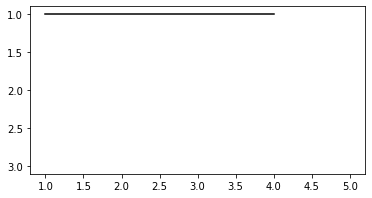

In [15]:
#5
import matplotlib.pyplot as plt
import numpy as np

# Define the polygon vertices
polygon = [(1, 1), (4, 6), (7, 3), (4, 1)]

def scan_line_fill(polygon):
    # Find the minimum and maximum y-coordinate values
    y_min = min(vertex[1] for vertex in polygon)
    y_max = max(vertex[1] for vertex in polygon)

    # Create an array to store the active edge table
    aet = [[] for _ in range(y_min, y_max + 1)]

    # Create an array to store the x-coordinates of the intersections
    x_intersections = []

    # Construct the active edge table
    for i in range(len(polygon)):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % len(polygon)]

        # Ignore horizontal edges
        if y1 != y2:
            # Sort the endpoints by their y-coordinate
            if y1 < y2:
                y_start, x_start = y1, x1
                y_end, x_end = y2, x2
            else:
                y_start, x_start = y2, x2
                y_end, x_end = y1, x1

            # Calculate the inverse slope of the edge
            slope_inverse = (x_end - x_start) / (y_end - y_start)

            # Add the edge to the active edge table at its starting y-coordinate
            aet[y_start - y_min].append([x_start, slope_inverse])

    # Fill the polygon using the scan line algorithm
    for scan_line in range(y_min, y_max + 1):
        # Add the x-coordinates of the edge intersections to the intersection array
        for edge in aet[scan_line - y_min]:
            x_intersections.append(edge[0])

        # Sort the x-coordinates in ascending order
        x_intersections.sort()

        # Fill the pixels between each pair of intersections
        for i in range(0, len(x_intersections), 2):
            x_start = int(x_intersections[i])
            x_end = int(x_intersections[i + 1]) if i + 1 < len(x_intersections) else x_start

            plt.plot(range(x_start, x_end + 1), [scan_line] * (x_end - x_start + 1), color='black')

        # Clear the intersection array for the next scan line
        x_intersections.clear()

        # Update the active edge table for the next scan line
        for edge_list in aet:
            for edge in edge_list:
                edge[0] += edge[1]

    plt.gca().invert_yaxis()
    plt.axis('scaled')
    plt.show()

# Test the algorithm
scan_line_fill(polygon)


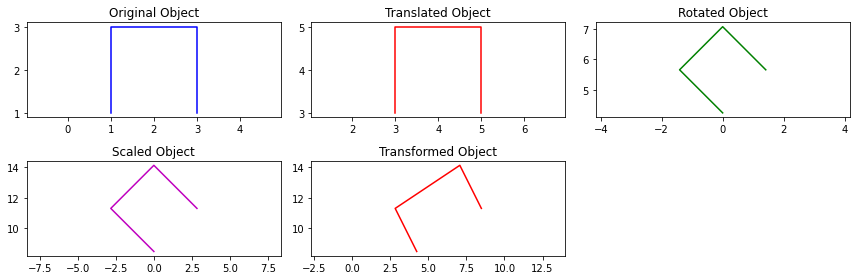

In [24]:
#6
import numpy as np
import matplotlib.pyplot as plt

# Define the object vertices
object_vertices = np.array([
    [1, 1],
    [1, 3],
    [3, 3],
    [3, 1]
])

# Define the transformation matrices
translation_matrix = np.array([
    [1, 0, 2],
    [0, 1, 2],
    [0, 0, 1]
])

rotation_angle = np.pi / 4
rotation_matrix = np.array([
    [np.cos(rotation_angle), -np.sin(rotation_angle)],
    [np.sin(rotation_angle), np.cos(rotation_angle)]
])

scaling_matrix = np.array([
    [2, 0],
    [0, 2]
])

# Apply the transformations
translated_vertices = np.matmul(translation_matrix[:2, :2], object_vertices.T).T + translation_matrix[:2, 2]
rotated_vertices = np.matmul(rotation_matrix, translated_vertices.T).T
scaled_vertices = np.matmul(scaling_matrix, rotated_vertices.T).T

# Plot the original and transformed objects
plt.figure(figsize=(12, 4))

# Plot the original object
plt.subplot(2, 3, 1)
plt.plot(object_vertices[:, 0], object_vertices[:, 1], 'b-')
plt.title('Original Object')
plt.axis('equal')

# Plot the translated object
plt.subplot(2, 3, 2)
plt.plot(translated_vertices[:, 0], translated_vertices[:, 1], 'r-')
plt.title('Translated Object')
plt.axis('equal')

# Plot the rotated object
plt.subplot(2, 3, 3)
plt.plot(rotated_vertices[:, 0], rotated_vertices[:, 1], 'g-')
plt.title('Rotated Object')
plt.axis('equal')

# Plot the scaled object
plt.subplot(2, 3, 4)
plt.plot(scaled_vertices[:, 0], scaled_vertices[:, 1], 'm-')
plt.title('Scaled Object')
plt.axis('equal')

# Plot the transformed object
plt.subplot(2, 3, 5)
plt.plot(transformed_vertices[:, 0], transformed_vertices[:, 1], 'r-')
plt.title('Transformed Object')
plt.axis('equal')

plt.tight_layout()
plt.show()


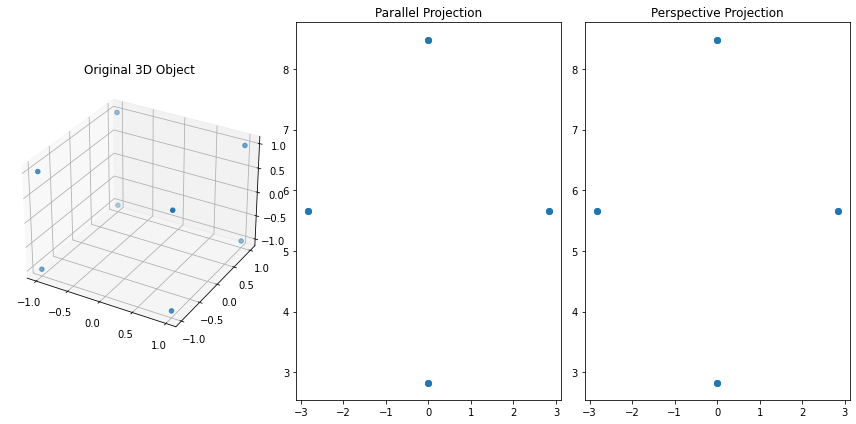

In [28]:
#7
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 3D object
object_vertices = np.array([
    [1, 1, 1],
    [-1, 1, 1],
    [-1, -1, 1],
    [1, -1, 1],
    [1, 1, -1],
    [-1, 1, -1],
    [-1, -1, -1],
    [1, -1, -1]
])

# Define the transformation matrices
translation_matrix = np.array([
    [1, 0, 0, 2],
    [0, 1, 0, 2],
    [0, 0, 1, 2],
    [0, 0, 0, 1]
])

rotation_matrix = np.array([
    [np.cos(np.pi/4), -np.sin(np.pi/4), 0, 0],
    [np.sin(np.pi/4), np.cos(np.pi/4), 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

scaling_matrix = np.array([
    [2, 0, 0, 0],
    [0, 2, 0, 0],
    [0, 0, 2, 0],
    [0, 0, 0, 1]
])

# Apply the transformations
homogeneous_vertices = np.hstack((object_vertices, np.ones((object_vertices.shape[0], 1))))
translated_vertices = np.matmul(translation_matrix, homogeneous_vertices.T).T
rotated_vertices = np.matmul(rotation_matrix, translated_vertices.T).T
transformed_vertices = np.matmul(scaling_matrix, rotated_vertices.T).T

# Perform parallel projection
parallel_projection_matrix = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 1]
])

parallel_projected_vertices = np.matmul(parallel_projection_matrix, transformed_vertices.T).T

# Perform perspective projection
perspective_projection_matrix = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1/4],
    [0, 0, 0, 0]
])

perspective_projected_vertices = np.matmul(perspective_projection_matrix, transformed_vertices.T).T

# Plot the 3D object and projections
fig = plt.figure(figsize=(12, 6))

# Plot the original 3D object
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(object_vertices[:, 0], object_vertices[:, 1], object_vertices[:, 2])
ax1.set_title('Original 3D Object')

# Plot the parallel projection
ax2 = fig.add_subplot(132)
ax2.scatter(parallel_projected_vertices[:, 0], parallel_projected_vertices[:, 1])
ax2.set_title('Parallel Projection')

# Plot the perspective projection
ax3 = fig.add_subplot(133)
ax3.scatter(perspective_projected_vertices[:, 0], perspective_projected_vertices[:, 1])
ax3.set_title('Perspective Projection')

plt.tight_layout()
plt.show()


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline

def hermite_curve(points, tangents, num_points=100):
    """
    Generate a Hermite curve given the points and tangents at each point.
    """
    t = np.linspace(0, 1, len(points))
    spline = CubicHermiteSpline(t, points.T, tangents.T)
    t_new = np.linspace(0, 1, num_points)
    return spline(t_new).T

# Define the points and tangents for the Hermite curve
points = np.array([[0, 0], [1, 1], [2, -1], [3, 0]])
tangents = np.array([[1, 0.5], [1, -1]])

# Generate the Hermite curve
hermite_points = hermite_curve(points, tangents)

# Plot the Hermite curve
plt.plot(hermite_points[:, 0], hermite_points[:, 1])
plt.show()


ValueError: The shapes of `y` and `dydx` must be identical.